In [1]:
import os, sys

notebook_dir = os.getcwd()

#add path
sys.path.append(os.path.abspath(os.path.join(notebook_dir, '..')))

In [3]:
from scripts.fetchPrepr_close_column import *
from scripts.sarima_model import *
from scripts.lstm_model import *

ModuleNotFoundError: No module named 'pmdarima'

In [4]:
# import pandas as pd
# Fetch and preprocess data
tsla_data = fetch_data('TSLA', '2015-01-01', '2025-01-31')
train_data, test_data = preprocess_data(tsla_data)

# index = pd.date_range(start='2023-01-24', periods=len(data['Close']), freq='D')
# test_data = pd.DataFrame(test_data, index=index)

# Extract the 'Close' column as a Series
# test_data_series = test_data['Close']

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [5]:
print(train_data)
print(test_data)
# test_data.shape

Ticker            TSLA
Date                  
2015-01-02   14.620667
2015-01-05   14.006000
2015-01-06   14.085333
2015-01-07   14.063333
2015-01-08   14.041333
...                ...
2023-01-17  131.490005
2023-01-18  128.779999
2023-01-19  127.169998
2023-01-20  133.419998
2023-01-23  143.750000

[2028 rows x 1 columns]
Ticker            TSLA
Date                  
2023-01-24  143.889999
2023-01-25  144.429993
2023-01-26  160.270004
2023-01-27  177.899994
2023-01-30  166.660004
...                ...
2025-01-24  406.579987
2025-01-27  397.149994
2025-01-28  398.089996
2025-01-29  389.100006
2025-01-30  400.279999

[507 rows x 1 columns]


In [6]:

print(f"NaN values in test_data: {train_data.isnull().sum()}")
print(f"NaN values in test_data: {test_data.isnull().sum()}")
# print(f"NaN values in predictions: {pd.isnull(predictions).sum()}")

NaN values in test_data: Ticker
TSLA    0
dtype: int64
NaN values in test_data: Ticker
TSLA    0
dtype: int64


In [7]:

# SARIMA Model
print("Training SARIMA model...")
sarima_model = fit_sarima(train_data)

Training SARIMA model...


NameError: name 'fit_sarima' is not defined

In [8]:

# SARIMA Model
sarima_predictions, sarima_mae, sarima_rmse, sarima_mape = evaluate_sarima(sarima_model, test_data['TSLA'])
print(f"SARIMA Metrics - MAE: {sarima_mae}, RMSE: {sarima_rmse}, MAPE: {sarima_mape}")

NameError: name 'evaluate_sarima' is not defined

In [9]:
# LSTM Model
print("Training LSTM model...")
lookback = 60
X_train, y_train, scaler = prepare_lstm_data(train_data, lookback)
X_test, y_test, _ = prepare_lstm_data(test_data, lookback)

Training LSTM model...


NameError: name 'prepare_lstm_data' is not defined

In [10]:

lstm_model = build_lstm_model((X_train.shape[1], 1))
lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

NameError: name 'build_lstm_model' is not defined

In [11]:

lstm_predictions, lstm_mae, lstm_rmse, lstm_mape = evaluate_lstm(lstm_model, X_test, y_test, scaler)
print(f"LSTM Metrics - MAE: {lstm_mae}, RMSE: {lstm_rmse}, MAPE: {lstm_mape}")

NameError: name 'evaluate_lstm' is not defined

In [12]:
import matplotlib.pyplot as plt

NameError: name 'sarima_predictions' is not defined

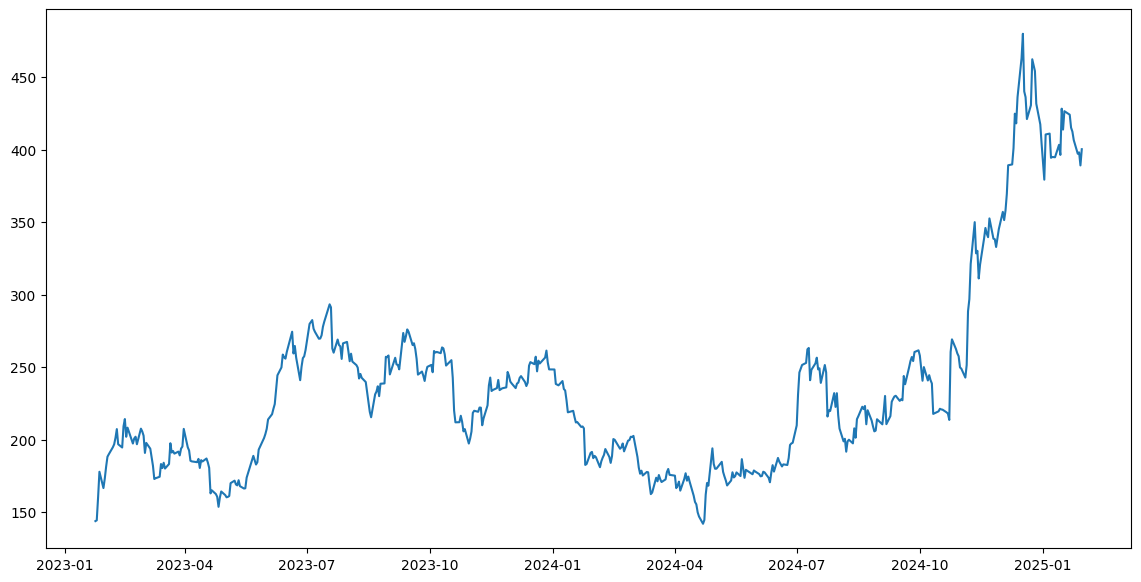

In [13]:

# Plot Results
plt.figure(figsize=(14, 7))
plt.plot(test_data.index, test_data['TSLA'], label='Actual Prices')
plt.plot(test_data.index, sarima_predictions, label='SARIMA Predictions')
plt.plot(test_data.index[-len(lstm_predictions):], lstm_predictions, label='LSTM Predictions')
plt.title('TSLA Stock Price Predictions')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [14]:
save_sarima_model(sarima_model)

NameError: name 'save_sarima_model' is not defined

In [15]:

save_lstm_model(lstm_model, filename='lstm_model.keras')

NameError: name 'save_lstm_model' is not defined